In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import numpy as np

from data_science import CompareData
from data_science.analysis_methodology import (
    Autoencoder,
    ClusterAnalysisDivergence,
    DeepAnT_CNN,
    HistogramConsistencyTest,
    ArchitectureWithDeepAnt,
)

In [3]:
# load data (download https://1drv.ms/u/s!AuAnQXzLmsvjihFVtI28bX0y0OyW?e=dDug9Y)
data = np.load(
    "data/TESTE01/RespNoiseFiveTEST01.npy"
)
# get dt
dt = data[1, 0] - data[0, 0]

# remove time collum
data = data[4000000:8000000, 1:]

In [4]:
# define methodologies to be used
histogram = HistogramConsistencyTest(
    nominal_rotation=60, filter_type="frequency", p_value_limit=0.05
)

auto_encoder = Autoencoder(size_sub_pack=512,load_model=True,
        path_load_model="data/model_John.h5")

deep_ant = DeepAnT_CNN(epochs=2)

adaptative_cluster = ClusterAnalysisDivergence(
    n_channels=True,
    size_sub_sample=256,
    oversampling=True,
    step_to_overlaps=50,
    discriminators=["rms", "kurtosis", "peak value"],
    nb_cluster=6,
    threshold=None,
    sigma=2.5,
    size_buffer=8,
)

In [5]:
processing_architecture = ArchitectureWithDeepAnt(deep_ant, [
        auto_encoder,
        histogram,
        adaptative_cluster,
        ])
        

In [6]:
compare_test = CompareData(data, dt, processing_architecture, slice_size=4000)

Number of samples: 1000
0 of 1000 samples analyzed...
 ======== * Starting sample analysis * ======== 
 deep ant: 0.002 s 1
 auto encoder: 0.665 s True
 ======== * Starting sample analysis * ======== 
 deep ant: 0.001 s 1
 auto encoder: 0.035 s True
 ======== * Starting sample analysis * ======== 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3999, 32)          96        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1999, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1998, 32)          2080      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 999, 32)           0         
_________________________________________________________________
flatten (Flatten)    

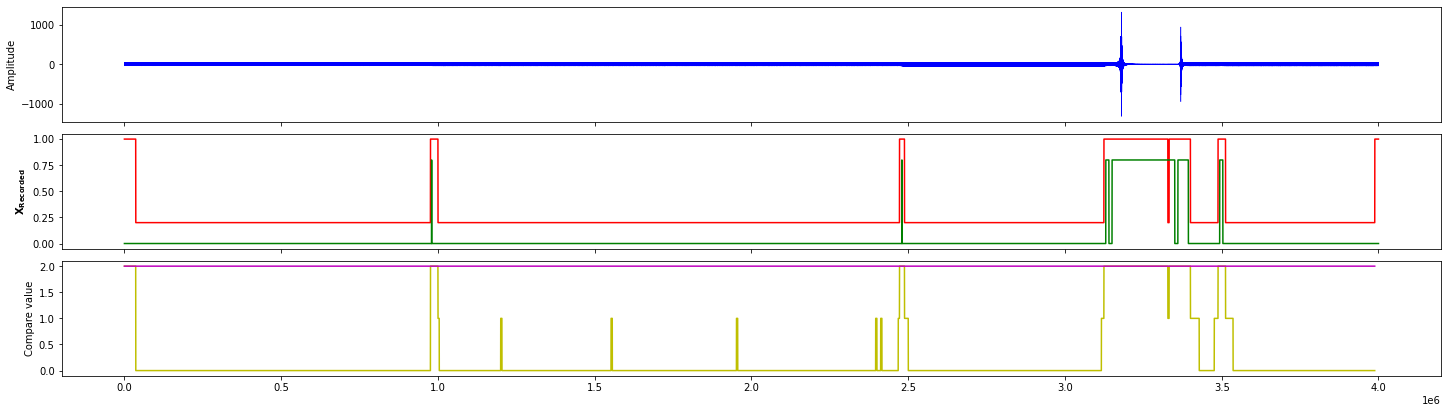

In [7]:
target = np.load("data/TESTE01/Targets.npy")[4000000:8000000]
compare_test.plot(target=target)

In [8]:
metrics = compare_test.get_evaluation_metrics(target)
metrics

{'tn': 903,
 'fp': 26,
 'fn': 1,
 'tp': 70,
 'accuracy_score': 0.973,
 'recall_score': 0.9859154929577465,
 'precision_score': 0.7291666666666666,
 'f1_score': 0.8383233532934132}